<font color='blue'>The Preprocess Operations:</font> 

In [40]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import ShuffleSplit

# Read Data and split them to Train and Test sets
Xy = pd.read_csv("Data.csv")

#Generate a smaller resample of dataset
#Xy = resample(Xy, n_samples=10000, random_state=0)

#find out if there is any Inf value and then replcae them with NaN
#print(np.where(X.values[738] >= np.finfo(np.float64).max)) 
Xy = Xy.replace([np.inf, -np.inf], -1) 

#Find out if there is any NaN in the dataframe and then remove it and reset the indexes 
#print(np.where(np.isnan(X))) 
Xy = Xy.dropna()
Xy = Xy.reset_index(drop=True)

#Separate examples and labels
y = Xy['marker']
X = Xy.drop(labels='marker', axis=1) #Removes the marker column from the dataframe
print('The Number of Examples: ', X.shape[0])
print('The Number of Features: ', X.shape[1])

#dreate sclaed data
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
scaledy = y

#Create oversampled data
attackClass = Xy[Xy['marker'] == 'Attack']  # separate classes
noEvClass = Xy[Xy['marker'] == 'NoEvents']  # separate classes
naturalClass = Xy[Xy['marker'] == 'Natural']  # separate classes
oversampledNoEvClass = resample(noEvClass, replace=True, n_samples=attackClass.shape[0], random_state=27)
overampledNaturalClass = resample(naturalClass, replace=True, n_samples=attackClass.shape[0], random_state=27)
oversampledXy = pd.concat([pd.concat([attackClass, oversampledNoEvClass]), overampledNaturalClass])
oversampledy = oversampledXy['marker']
oversampledX = oversampledXy.drop(labels='marker', axis=1) #Removes the marker column from the dataframe

#Create subsampled data
attackClass = Xy[Xy['marker'] == 'Attack']  # separate classes
noEvClass = Xy[Xy['marker'] == 'NoEvents']  # separate classes
naturalClass = Xy[Xy['marker'] == 'Natural']  # separate classes
subsamplesAttackClass = resample(attackClass, replace=True, n_samples=naturalClass.shape[0], random_state=27)
subsampledXy = pd.concat([pd.concat([subsamplesAttackClass, noEvClass]), naturalClass])
subsampledy = subsampledXy['marker']
subsampledX = subsampledXy.drop(labels='marker', axis=1) #Removes the marker column from the dataframe

#Create scaled oversampled data
scaler = StandardScaler()
scaledOversampledX = scaler.fit_transform(oversampledX)
scaledOversampledy = oversampledy

#Create scaled undersampled data
scaler = StandardScaler()
scaledSubsampledX = scaler.fit_transform(subsampledX)
scaledSubsampledy = subsampledy

#Model Initialization
crossNumber = 2     #The number of folds in cross validation
kFold = ShuffleSplit(n_splits=crossNumber, test_size=0.3, random_state=0) #the split methos in cross validation

The Number of Examples:  78377
The Number of Features:  128


In [41]:
from sklearn.model_selection import train_test_split

#Split the data
X_train, X_test, y_train, y_test = train_test_split(scaledX, scaledy, test_size=.3, random_state=0)


<font color='blue'>Desicion Tree:</font> 

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import time
import matplotlib.pylab as plt

# Intitialization
score1_1 = np.array([])
score1_2 = np.array([])
numEst = np.arange(10,201,10) 

for est in numEst:
    #The Classifier
    clf = DecisionTreeClassifier(max_depth=est)

    start_time = time.time()
    clf.fit(X_train, y_train)
    
    print('='*30)
    name = clf.__class__.__name__ 
    print(name, ': Run Time = ', time.time()-start_time)
    
    train_predictions = clf.predict(X_test)    
    print( metrics.classification_report(y_test, train_predictions, digits=3))
    score1_1 = np.append(score1_1, metrics.f1_score(y_test, train_predictions,average='macro') )
    score1_2 = np.append(score1_2, metrics.accuracy_score(y_test, train_predictions) )
    
# # Plot the results
# f = plt.figure()
# plt.plot(numEst, score1)
# plt.xlabel('The Depth of the Tree')
# plt.ylabel('F1 Score')
# plt.title('The F1 Scores in Decision Tree')
# plt.show()
# f.savefig("Jan 2020, DecTree, Scen1.png", bbox_inches='tight', dpi=600)

DecisionTreeClassifier : Run Time =  3.6462783813476562
              precision    recall  f1-score   support

      Attack      0.760     0.963     0.850     16635
     Natural      0.684     0.234     0.348      5501
    NoEvents      0.921     0.372     0.529      1378

    accuracy                          0.758     23514
   macro avg      0.788     0.523     0.576     23514
weighted avg      0.752     0.758     0.714     23514

DecisionTreeClassifier : Run Time =  5.634928226470947
              precision    recall  f1-score   support

      Attack      0.848     0.923     0.884     16635
     Natural      0.715     0.542     0.617      5501
    NoEvents      0.870     0.777     0.821      1378

    accuracy                          0.826     23514
   macro avg      0.811     0.747     0.774     23514
weighted avg      0.818     0.826     0.818     23514

DecisionTreeClassifier : Run Time =  6.279206275939941
              precision    recall  f1-score   support

      Attack     

DecisionTreeClassifier : Run Time =  6.329077959060669
              precision    recall  f1-score   support

      Attack      0.902     0.894     0.898     16635
     Natural      0.702     0.725     0.714      5501
    NoEvents      0.877     0.852     0.864      1378

    accuracy                          0.852     23514
   macro avg      0.827     0.824     0.825     23514
weighted avg      0.854     0.852     0.853     23514

DecisionTreeClassifier : Run Time =  6.335068702697754
              precision    recall  f1-score   support

      Attack      0.902     0.894     0.898     16635
     Natural      0.701     0.724     0.712      5501
    NoEvents      0.876     0.856     0.866      1378

    accuracy                          0.852     23514
   macro avg      0.826     0.825     0.825     23514
weighted avg      0.853     0.852     0.853     23514



[0.57593427 0.77387452 0.82190285 0.82574332 0.8253579  0.82386591
 0.82556555 0.82405689 0.82611308 0.82550413 0.82549213 0.82664119
 0.82641179 0.82770743 0.82575051 0.82366831 0.82451732 0.82546254
 0.82529024 0.82538184]
[0.7580165  0.82550821 0.85098239 0.85272604 0.85217317 0.85230076
 0.85247087 0.85132262 0.85268351 0.85255592 0.85230076 0.85378923
 0.8540444  0.85425704 0.85204559 0.85153526 0.85213065 0.85170537
 0.85230076 0.85179042]


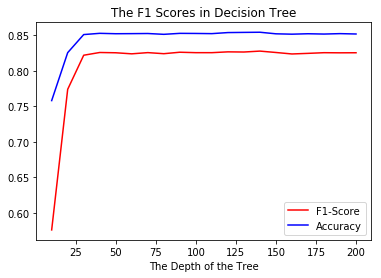

In [54]:
print(score1_1)
print(score1_2)
# Plot the results
f = plt.figure()
plt.plot(numEst, score1_1, 'r', label="F1-Score")
plt.plot(numEst, score1_2, 'b', label="Accuracy")
plt.xlabel('The Depth of the Tree')
plt.legend()
plt.title('The F1 Scores in Decision Tree')
plt.show()
f.savefig("Jan 2020, DecTree, Scen1.png", bbox_inches='tight', dpi=600)

<font color='blue'>Random Forest</font> 

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time
import matplotlib.pylab as plt

# Intitialization
score2_1 = np.array([])
score2_2 = np.array([])
numEst = np.arange(10,201,10) 

for est in numEst:
    #The Classifier
    clf = RandomForestClassifier(n_estimators=est)

    start_time = time.time()
    clf.fit(X_train, y_train)
    
    print('='*30)
    name = clf.__class__.__name__ 
    print(name, ': Run Time = ', time.time()-start_time)
    
    train_predictions = clf.predict(X_test)    
    print( metrics.classification_report(y_test, train_predictions, digits=3))
    score2_1 = np.append(score2_1, metrics.f1_score(y_test, train_predictions,average='macro') )
    score2_2 = np.append(score2_2, metrics.accuracy_score(y_test, train_predictions) )
    
# # Plot the results
# f = plt.figure()
# plt.plot(numEst, score2)
# plt.xlabel('Number of Trees in Random Forest')
# plt.ylabel('F1 Score')
# plt.title('The F1 Scores in Random Forest')
# plt.show()
# f.savefig("Jan 2020, RandomForest, Scen2.png", bbox_inches='tight', dpi=600)

RandomForestClassifier : Run Time =  3.849165678024292
              precision    recall  f1-score   support

      Attack      0.893     0.970     0.930     16635
     Natural      0.879     0.671     0.761      5501
    NoEvents      0.977     0.894     0.934      1378

    accuracy                          0.895     23514
   macro avg      0.917     0.845     0.875     23514
weighted avg      0.895     0.895     0.891     23514

RandomForestClassifier : Run Time =  7.247647523880005
              precision    recall  f1-score   support

      Attack      0.900     0.977     0.937     16635
     Natural      0.908     0.690     0.784      5501
    NoEvents      0.984     0.903     0.942      1378

    accuracy                          0.906     23514
   macro avg      0.931     0.857     0.888     23514
weighted avg      0.906     0.906     0.901     23514

RandomForestClassifier : Run Time =  10.79812216758728
              precision    recall  f1-score   support

      Attack      

RandomForestClassifier : Run Time =  68.96054768562317
              precision    recall  f1-score   support

      Attack      0.912     0.981     0.945     16635
     Natural      0.926     0.729     0.815      5501
    NoEvents      0.987     0.925     0.955      1378

    accuracy                          0.918     23514
   macro avg      0.941     0.878     0.905     23514
weighted avg      0.919     0.918     0.915     23514

RandomForestClassifier : Run Time =  73.45362043380737
              precision    recall  f1-score   support

      Attack      0.912     0.981     0.945     16635
     Natural      0.929     0.729     0.817      5501
    NoEvents      0.988     0.922     0.953      1378

    accuracy                          0.919     23514
   macro avg      0.943     0.877     0.905     23514
weighted avg      0.920     0.919     0.916     23514



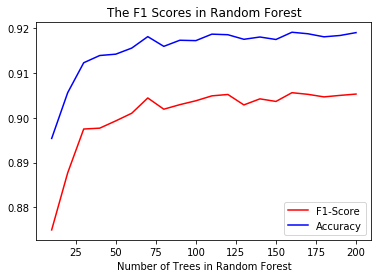

In [55]:
# Plot the results
f = plt.figure()
plt.plot(numEst, score2_1, 'r', label="F1-Score")
plt.plot(numEst, score2_2, 'b', label="Accuracy")
plt.xlabel('Number of Trees in Random Forest')
plt.legend()
plt.title('The F1 Scores in Random Forest')
plt.show()
f.savefig("Jan 2020, Random Forest, Scen1.png", bbox_inches='tight', dpi=600)

<font color='blue'>Bagged decision tree with 10 estimator:</font> 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
import time


#Base Estimator for bagging
baseEst = DecisionTreeClassifier()

#The Classifier
clf = BaggingClassifier(base_estimator=baseEst, n_estimators=10, random_state=0)

start_time = time.time()
clf.fit(X_train, y_train)
    
name = clf.__class__.__name__ 
print(name, ': Run Time = ', time.time()-start_time)
    
train_predictions = clf.predict(X_test)    
print( metrics.classification_report(y_test, train_predictions, digits=3))

BaggingClassifier : Run Time =  77.98684477806091
              precision    recall  f1-score   support

      Attack      0.965     0.931     0.947     16551
     Natural      0.938     0.966     0.952     16795
    NoEvents      0.994     1.000     0.997     16751

    accuracy                          0.966     50097
   macro avg      0.966     0.966     0.966     50097
weighted avg      0.966     0.966     0.966     50097



<font color='blue'>Gradient Boosting</font> 

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import time

#The Classifier
clf = GradientBoostingClassifier(n_estimators=50,learning_rate=.2, random_state=10)

start_time = time.time()
clf.fit(X_train, y_train)
    
name = clf.__class__.__name__ 
print(name, ': Run Time = ', time.time()-start_time)
    
train_predictions = clf.predict(X_test)    
print( metrics.classification_report(y_test, train_predictions, digits=3))

GradientBoostingClassifier : Run Time =  163.83321356773376
              precision    recall  f1-score   support

      Attack      0.718     0.512     0.598     16551
     Natural      0.646     0.759     0.698     16795
    NoEvents      0.858     0.951     0.902     16751

    accuracy                          0.741     50097
   macro avg      0.741     0.740     0.732     50097
weighted avg      0.741     0.741     0.733     50097



<font color='blue'>XGBoosting</font> 

In [15]:
from xgboost import XGBClassifier
from sklearn import metrics
import time

#The Classifier
clf = XGBClassifier()

start_time = time.time()
clf.fit(X_train, y_train)
    
name = clf.__class__.__name__ 
print(name, ': Run Time = ', time.time()-start_time)
    
train_predictions = clf.predict(X_test)    
print( metrics.classification_report(y_test, train_predictions, digits=3))

XGBClassifier : Run Time =  120.43530917167664
              precision    recall  f1-score   support

      Attack      0.720     0.481     0.577     16551
     Natural      0.628     0.761     0.688     16795
    NoEvents      0.839     0.937     0.885     16751

    accuracy                          0.727     50097
   macro avg      0.729     0.726     0.717     50097
weighted avg      0.729     0.727     0.717     50097



<font color='blue'>Adaptive Boosting</font> 

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import time

#The Classifier
clf = AdaBoostClassifier()

start_time = time.time()
clf.fit(X_train, y_train)
    
name = clf.__class__.__name__ 
print(name, ': Run Time = ', time.time()-start_time)
    
train_predictions = clf.predict(X_test)    
print( metrics.classification_report(y_test, train_predictions, digits=3))

AdaBoostClassifier : Run Time =  52.3456015586853
              precision    recall  f1-score   support

      Attack      0.511     0.536     0.523     16551
     Natural      0.522     0.432     0.473     16795
    NoEvents      0.837     0.941     0.886     16751

    accuracy                          0.636     50097
   macro avg      0.623     0.636     0.627     50097
weighted avg      0.624     0.636     0.627     50097



<font color='blue'>KNN (k=1)</font> 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

#The Classifier
clf = KNeighborsClassifier(n_neighbors=1, p=1)        # p=1 is Manhatam distance

start_time = time.time()
clf.fit(X_train, y_train)
    
name = clf.__class__.__name__ 
print(name, ': Run Time = ', time.time()-start_time)
    
train_predictions = clf.predict(X_test)    
print( metrics.classification_report(y_test, train_predictions, digits=3))

KNeighborsClassifier : Run Time =  16.103675365447998
              precision    recall  f1-score   support

      Attack      0.982     0.929     0.955     16551
     Natural      0.937     0.982     0.959     16795
    NoEvents      0.995     1.000     0.998     16751

    accuracy                          0.971     50097
   macro avg      0.971     0.971     0.971     50097
weighted avg      0.971     0.971     0.971     50097



<font color='blue'>KNN (k=11)</font> 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

#The Classifier
clf = KNeighborsClassifier(n_neighbors=11, p=1)        # p=1 is Manhatam distance

start_time = time.time()
clf.fit(X_train, y_train)
    
name = clf.__class__.__name__ 
print(name, ': Run Time = ', time.time()-start_time)
    
train_predictions = clf.predict(X_test)    
print( metrics.classification_report(y_test, train_predictions, digits=3))

KNeighborsClassifier : Run Time =  15.690041065216064
              precision    recall  f1-score   support

      Attack      0.894     0.747     0.814     16551
     Natural      0.809     0.903     0.854     16795
    NoEvents      0.953     0.997     0.975     16751

    accuracy                          0.883     50097
   macro avg      0.885     0.882     0.881     50097
weighted avg      0.885     0.883     0.881     50097



<font color='blue'>Linear SVC</font> 

In [23]:
from sklearn.svm import LinearSVC
from sklearn import metrics
import time

#The Classifier
clf = LinearSVC()

start_time = time.time()
clf.fit(X_train, y_train)
    
name = clf.__class__.__name__ 
print(name, ': Run Time = ', time.time()-start_time)
    
train_predictions = clf.predict(X_test)    
print( metrics.classification_report(y_test, train_predictions, digits=3)) 

C:\Users\Mohammad\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC : Run Time =  158.38665509223938
              precision    recall  f1-score   support

      Attack      0.826     0.313     0.454     16551
     Natural      0.579     0.767     0.660     16795
    NoEvents      0.741     0.954     0.834     16751

    accuracy                          0.680     50097
   macro avg      0.715     0.678     0.649     50097
weighted avg      0.715     0.680     0.650     50097



<font color='blue'>SVC</font> 

In [24]:
from sklearn.svm import SVC
from sklearn import metrics
import time

#The Classifier
clf = SVC(kernel='rbf')

start_time = time.time()
clf.fit(X_train, y_train)
    
name = clf.__class__.__name__ 
print(name, ': Run Time = ', time.time()-start_time)
    
train_predictions = clf.predict(X_test)    
print( metrics.classification_report(y_test, train_predictions, digits=3)) 

C:\Users\Mohammad\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC : Run Time =  2407.413776397705
              precision    recall  f1-score   support

      Attack      0.612     0.578     0.595     16551
     Natural      0.631     0.548     0.587     16795
    NoEvents      0.805     0.954     0.873     16751

    accuracy                          0.694     50097
   macro avg      0.682     0.694     0.685     50097
weighted avg      0.683     0.694     0.685     50097

